In [245]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import torch
import torchvision
import torchvision.transforms as transforms
transform_train = transforms.Compose([
            transforms.RandomCrop(32, padding=4),
            transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
        #self.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
        ])


class CNNData:
    
    def unpickle(self, file):
        
        with open(file,'rb') as fo:
            dictonary = pickle.load(fo, encoding='bytes')
        
        return dictonary
    
    def store(self):
        
        final_dictionary = {}
        
        
        for i in range(1,6):
            fileName = "data_batch_" + str(i)
            dictionary = self.unpickle(fileName)
            #print((dictionary[b'data']))
            if i == 1:
                final_dictionary = dictionary
            else:
                final_dictionary[b'labels'].extend(dictionary[b'labels'])
                final_dictionary[b'data'] = np.append(final_dictionary[b'data'],dictionary[b'data'], axis=0)
            
        del final_dictionary[b'batch_label']
        del final_dictionary[b'filenames']
                
        return final_dictionary
    
    def showTestImage(self,data):
        i=0
        for key, value in data.items():
            i += 1
            if i==2:
                plt.imshow(value[0].reshape(3,32,32).transpose(1,2,0))
                
    def modelaccuracies(self,data):
        
        models = []
        max_depths = [10,11,12,13]
        
        for i in max_depths:
            
            clf = DecisionTreeClassifier(random_state=0,max_depth=i)
            clf.fit(X_train, y_train)
            models.append(clf)
        
        return models

    def splitting_data(self,X,y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                            test_size=0.2, random_state=42)

        return X_train, X_test, y_train, y_test
    
    def checkAccuracies(self,X_train, X_test, y_train, y_test):
        for i in models:
            training_score = i.score(X_train, y_train)
            test_score = i.score(X_test, y_test)
            print("training Accuracy " + str(training_score))
            print("test Accuracy " + str(test_score))
            
    def convertDataForCNN(self, X, y):
       
        X = X / 127.5
        X = X -1        
        return X, y
    
    def convertTensor(self,data,dtype):
        return torch.tensor(data.astype(dtype))
    
    def getoutputclass(self,y):
        y_temp = y.max().detach().numpy()
        for i in range(len(y[0])):
            if y_temp == y[0][i].detach().numpy():
                return i

    def calcAccuracy(self,x_test,y_test,model):
        tp = 0
        fp = 0
        for i in range(len(x_test)-1):
            y_pred = self.getoutputclass(torch.softmax(model(x_test[i].reshape(1,3,32,32)),dim=1))
            if y_pred == y_test[i]:
                tp = tp + 1
            else:
                fp = fp + 1
        return tp,fp 
    def transform(self):
        self.transform_train = transforms.Compose([
        self.transforms.RandomCrop(32, padding=4),
        self.transforms.RandomHorizontalFlip(),
        self.transforms.ToTensor()
        #self.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
        ])
        # Normalize the test set same as training set without augmentation
        #self.transform_test = transforms.Compose([
        #self.transforms.ToTensor(),
        #self.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),])
        
    def transformdata(self,data):
        X1 = data.reshape(3,32,32).transpose(1,2,0)
        X1 = transforms.ToPILImage()(X1)
        #.convert("RGB")
        X1 = transform_train(X1)
        X1 = X1.numpy()
        return X1

In [200]:
cnnData = CNNData()

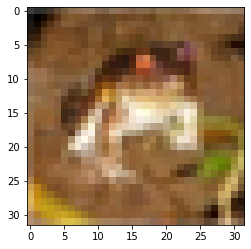

In [246]:
cnnData = CNNData()
final_data = cnnData.store() 
cnnData.showTestImage(final_data)
X = final_data[b'data']
y = final_data[b'labels']
X_train, X_test, y_train, y_test = cnnData.splitting_data(X, y)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


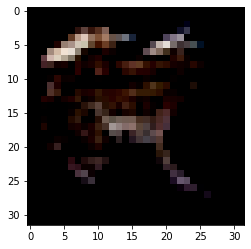

In [166]:
# test image
plt.imshow(X_train[0].reshape(3,32,32).transpose(1,2,0))

In [165]:
X_train, y = cnnData.convertDataForCNN(X_train,y)

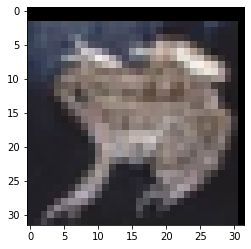

In [228]:
# Transform data
#cnnData.transform()
X1 = cnnData.transformdata(X_train[0])
plt.imshow(X1.reshape(3,32,32).transpose(1,2,0))

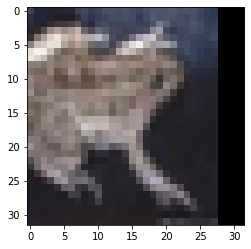

In [229]:
X2 = cnnData.transformdata(X_train[0])
plt.imshow(X2.reshape(3,32,32).transpose(1,2,0))

In [247]:
y_train = np.array(y_train)
y_test = np.array(y_test)

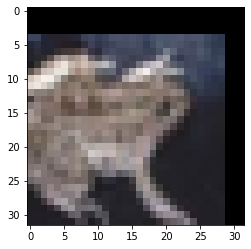

In [238]:

plt.imshow((X_aug_train[0]).reshape(3,32,32).transpose(1,2,0))

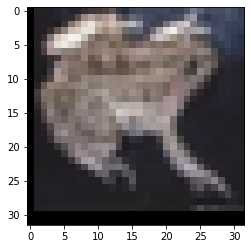

In [239]:

plt.imshow((X_aug_train[40000]).reshape(3,32,32).transpose(1,2,0))

In [181]:
X_aug_train = np.empty(shape=[80000, 3072])
y_aug_train = np.empty(shape=[80000, ])
j = len(X_train)
for i in range(len(X_train)):
    X_aug_train[i] = X_train[i]
    y_aug_train[i] = y_train[i]
    X_aug_train[j] = (cnnData.transformdata(X_train[i]).reshape(3072,))
    y_aug_train[j] = y_train[i]
    j = j + 1    

In [248]:
X_aug_train = np.empty(shape=[80000, 3072])
y_aug_train = np.empty(shape=[80000, ])
X_aug_test = np.empty(shape=[10000, 3072])
j = len(X_train)
for i in range(len(X_train)):
    X_aug_train[i] = (cnnData.transformdata(X_train[i]).reshape(3072,))
    y_aug_train[i] = y_train[i]
    X_aug_train[j] = (cnnData.transformdata(X_train[i]).reshape(3072,))
    y_aug_train[j] = y_train[i]
    j = j + 1
    if i < 10000:
        X_aug_test[i] = (cnnData.transformdata(X_test[i]).reshape(3072,))

In [252]:
X_train = X_aug_train 
y_train = y_aug_train
X_test = X_aug_test

In [253]:
X_train.shape

(80000, 3072)

In [254]:
y_train.shape

(80000,)

In [255]:
#For CNN
#X_train, y = cnnData.convertDataForCNN(X_train,y)
#X_test, y = cnnData.convertDataForCNN(X_test, y)
#X_train, X_test, y_train, y_test = cnnData.splitting_data(X, y)

#plt.imshow(X_train[2].reshape(3,32,32).transpose(1,2,0))

X_train = cnnData.convertTensor(X_train,np.float32)
X_test = cnnData.convertTensor(X_test,np.float32)
y_train = cnnData.convertTensor(y_train,np.int64)
y_test = cnnData.convertTensor(y_test,np.int64)

In [120]:
X_test.shape

torch.Size([10000, 3072])

In [194]:
plt.imshow(X_train[30000].reshape(3,32,32).transpose(1,2,0))

TypeError: transpose() received an invalid combination of arguments - got (int, int, int), but expected one of:
 * (name dim0, name dim1)
 * (int dim0, int dim1)


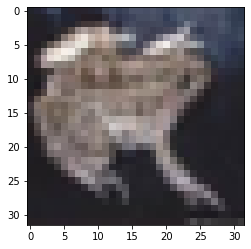

In [68]:
plt.imshow(X_train[0].reshape(3,32,32).transpose(1,2,0))

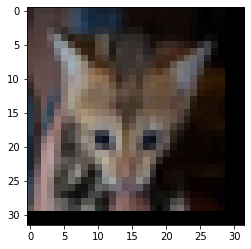

In [36]:
plt.imshow(X_aug_train[70000].reshape(3,32,32).transpose(1,2,0))

In [ ]:
torch.manual_seed(0)
C=3
num_filter = 10
filter_size = 3
model = torch.nn.Sequential(

    torch.nn.Conv2d(in_channels=C,
                    out_channels = 32,
                    kernel_size=filter_size,
                    stride=1
                    padding=1,bias=False),
    torch.nn.BatchNorm2d(32)
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=filter_size,stride = 2),
    torch.nn.Conv2d(in_channels=20,
                    out_channels = 40,
                    kernel_size=filter_size,
                    padding=filter_size//2),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=filter_size,stride = 2),  
    torch.nn.ReLU(),
    torch.nn.Conv2d(in_channels=40,
                    out_channels = 60,
                    kernel_size=filter_size,
                    padding=filter_size//2),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=filter_size,stride = 2),  
    torch.nn.Flatten(),
    torch.nn.Linear(60*4*4, (60*4*4)*3),
    torch.nn.ReLU(),
    torch.nn.Linear((60*4*4)*3,10),
)

In [264]:
torch.manual_seed(0)
C=3
num_filter = 10
filter_size = 2
model = torch.nn.Sequential(

    torch.nn.Conv2d(in_channels=C,
                    out_channels = 20,
                    kernel_size=filter_size,
                    padding=filter_size//2),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=filter_size,stride = 2),
    torch.nn.Conv2d(in_channels=20,
                    out_channels = 40,
                    kernel_size=filter_size,
                    padding=filter_size//2),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=filter_size,stride = 2),  
    torch.nn.ReLU(),
    torch.nn.Conv2d(in_channels=40,
                    out_channels = 60,
                    kernel_size=filter_size,
                    padding=filter_size//2),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=filter_size,stride = 2),  
    torch.nn.Flatten(),
    torch.nn.Linear(60*4*4, (60*4*4)*3),
    torch.nn.ReLU(),
    torch.nn.Linear((60*4*4)*3,10),
)

In [265]:
batch_size = 50
num_epoch = 10

#loss = torch.nn.CrossEntropyLoss()
loss = torch.nn.CrossEntropyLoss()
#categorical_crossentropy
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
#weight_decay=1e-3

In [ ]:
for epoch in range(1, num_epoch+1):
    for i in range(0, len(X_train), batch_size):        
        X = X_train[i:i+batch_size].reshape(batch_size,3,32,32)
        y = y_train[i:i+batch_size]

        y_pred = model(X)
        l = loss(y_pred, y)
        
        model.zero_grad()
        l.backward()
        optimizer.step()
    print("Epoch %d final minibatch had loss %.4f" % (epoch, l.item()))    

Epoch 1 final minibatch had loss 2.2749
Epoch 2 final minibatch had loss 1.9595
Epoch 3 final minibatch had loss 1.8896
Epoch 4 final minibatch had loss 1.7321
Epoch 5 final minibatch had loss 1.5287
Epoch 6 final minibatch had loss 1.4230
Epoch 7 final minibatch had loss 1.3634
Epoch 8 final minibatch had loss 1.3295


In [259]:
tp,fp = cnnData.calcAccuracy(X_test,y_test,model)
print("True positives:",tp)
print("False positives:",fp)
print(len(X_test))
print(tp / len(X_test))

True positives: 4619
False positives: 5380
10000
0.4619


In [202]:
X_test.shape

torch.Size([40000, 3072])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


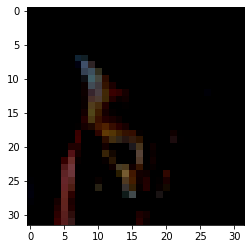

In [143]:
temp = X_train[30000].numpy()
plt.imshow(temp.reshape(3,32,32).transpose(1,2,0))